In [4]:
#Gerekli kütüphaneleri import edelim.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet

In [53]:
#Verisetini indirip kopyalayalım ve inceleyelim.
ad=pd.read_csv('SydneyHousePrices.csv')
df=ad.copy()
df

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [7]:
print('Kolonların tipleri:\n',df.dtypes)
print('-'*80)
print('Kolonlar:',df.columns)
print('-'*80)
print('Satır sayısı:',df.shape[0])
print('Kolon sayısı:',df.shape[1])

Kolonların tipleri:
 Date           object
Id              int64
suburb         object
postalCode      int64
sellPrice       int64
bed           float64
bath            int64
car           float64
propType       object
dtype: object
--------------------------------------------------------------------------------
Kolonlar: Index(['Date', 'Id', 'suburb', 'postalCode', 'sellPrice', 'bed', 'bath', 'car',
       'propType'],
      dtype='object')
--------------------------------------------------------------------------------
Satır sayısı: 199504
Kolon sayısı: 9


In [8]:
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,199504.0,9.975250e+04,5.759199e+04,1.0,49876.75,99752.5,149628.25,1.995040e+05
postalCode,199504.0,2.196379e+03,1.930535e+02,2000.0,2082.00,2144.0,2211.00,4.878000e+03
sellPrice,199504.0,1.269776e+06,6.948239e+06,1.0,720000.00,985000.0,1475000.00,2.147484e+09
bed,199350.0,3.516479e+00,1.066555e+00,1.0,3.00,3.0,4.00,9.900000e+01
bath,199504.0,1.890669e+00,9.260006e-01,1.0,1.00,2.0,2.00,9.900000e+01
car,181353.0,1.936224e+00,1.060237e+00,1.0,1.00,2.0,2.00,4.100000e+01


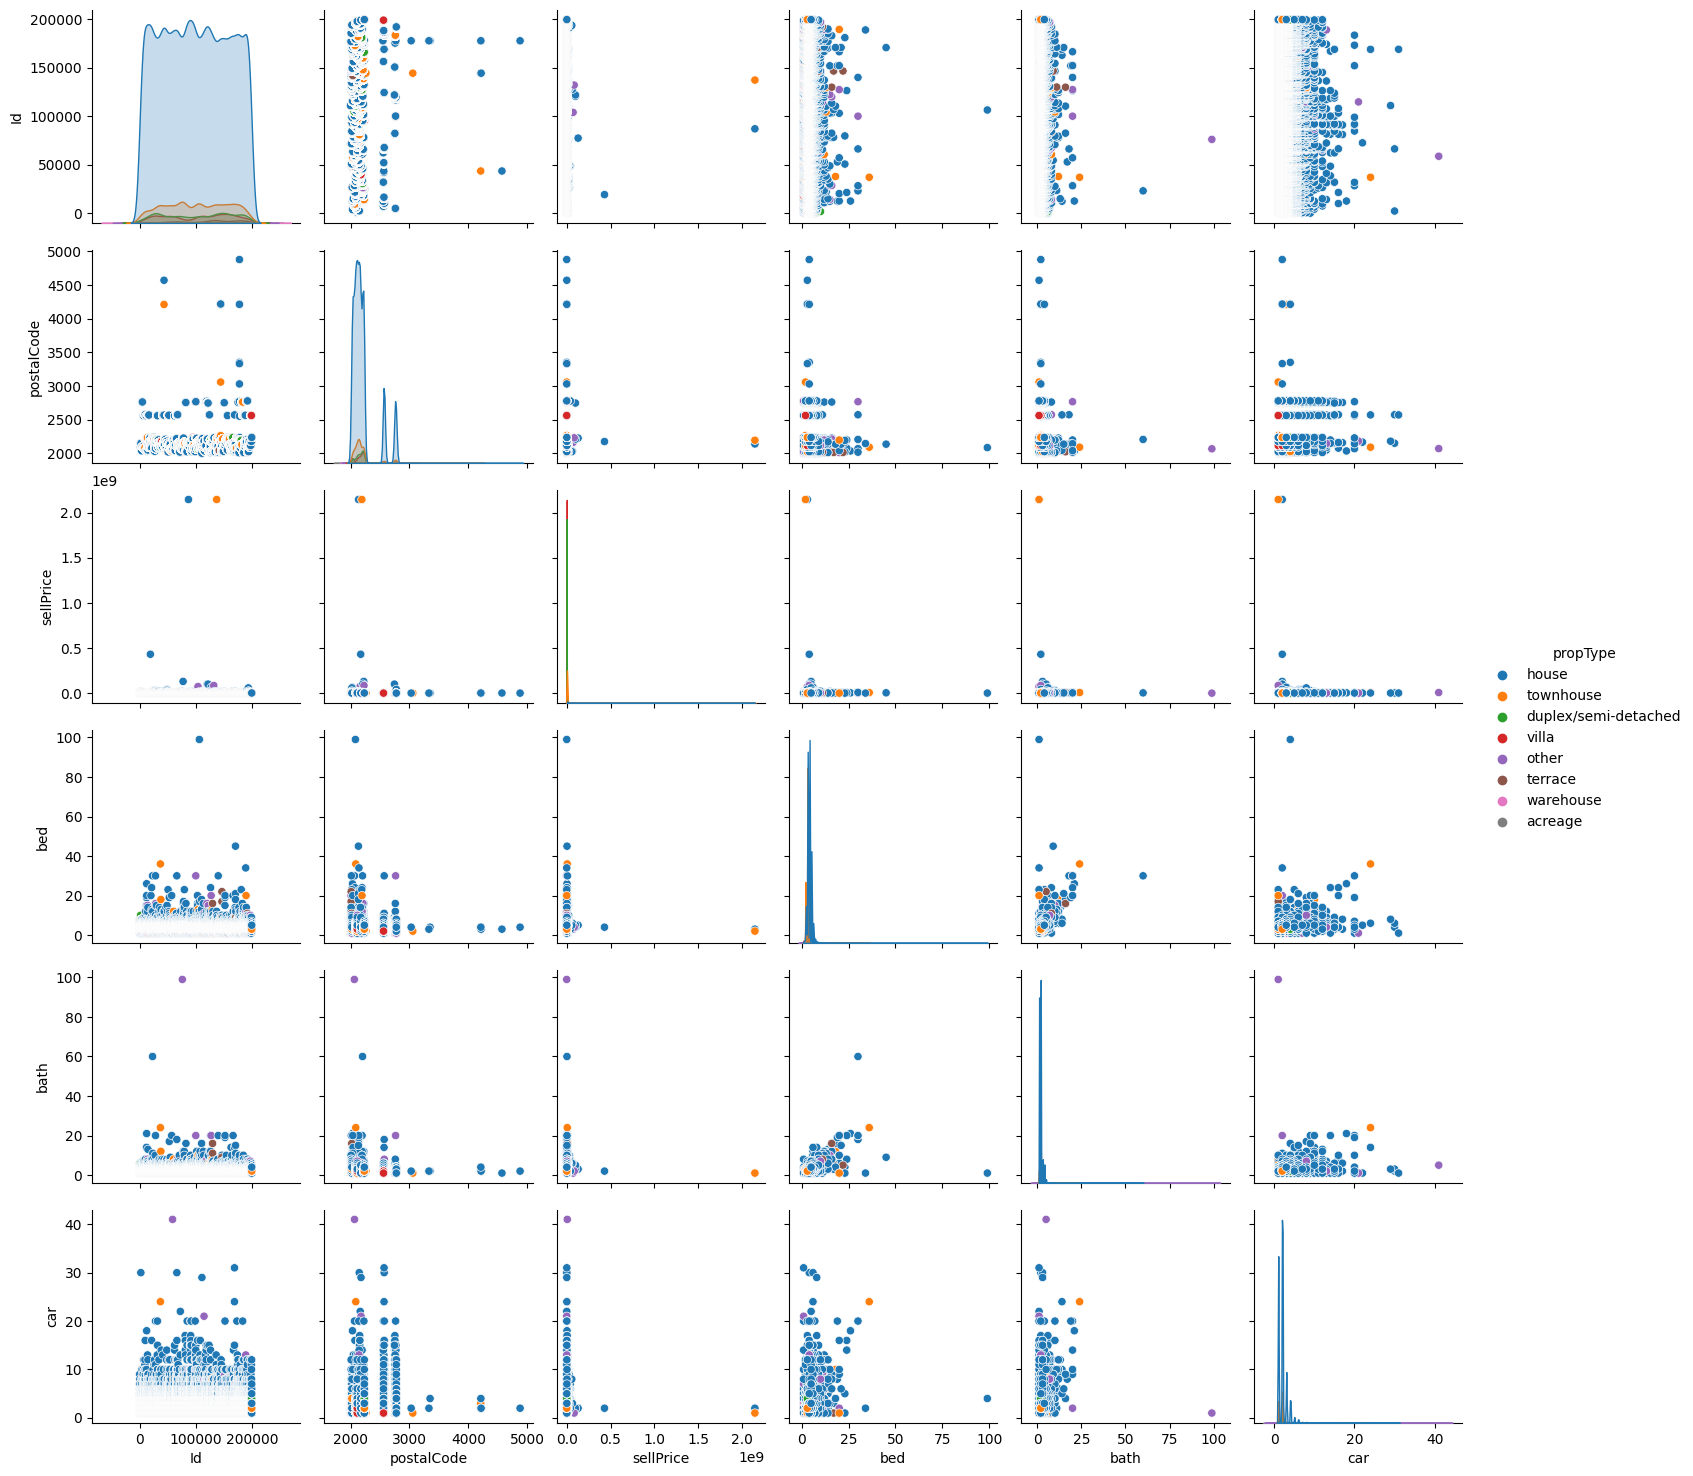

In [10]:
sns.pairplot(df, hue = "propType");

In [54]:
#Tarih verisini ayıralım ,gereksiz sütunları silip ev tipi değişkenini amaca uygun şekilde dönüştürelim.
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df = df.drop(["Id","suburb","Date"],axis=1)
df = pd.get_dummies(df,columns= ["propType"], prefix= ["propType"], dtype=int)

In [12]:
df.head()

,postalCode,sellPrice,bed,bath,car,Year,Month,Day,propType_acreage,propType_duplex/semi-detached,propType_house,propType_other,propType_terrace,propType_townhouse,propType_villa,propType_warehouse
0,2107,1210000,4.0,2,2.0,2019,6,19,0,0,1,0,0,0,0,0
1,2107,2250000,4.0,3,4.0,2019,6,13,0,0,1,0,0,0,0,0
2,2107,2920000,3.0,3,2.0,2019,6,7,0,0,1,0,0,0,0,0
3,2107,1530000,3.0,1,2.0,2019,5,28,0,0,1,0,0,0,0,0
4,2107,8000000,5.0,4,4.0,2019,5,22,0,0,1,0,0,0,0,0


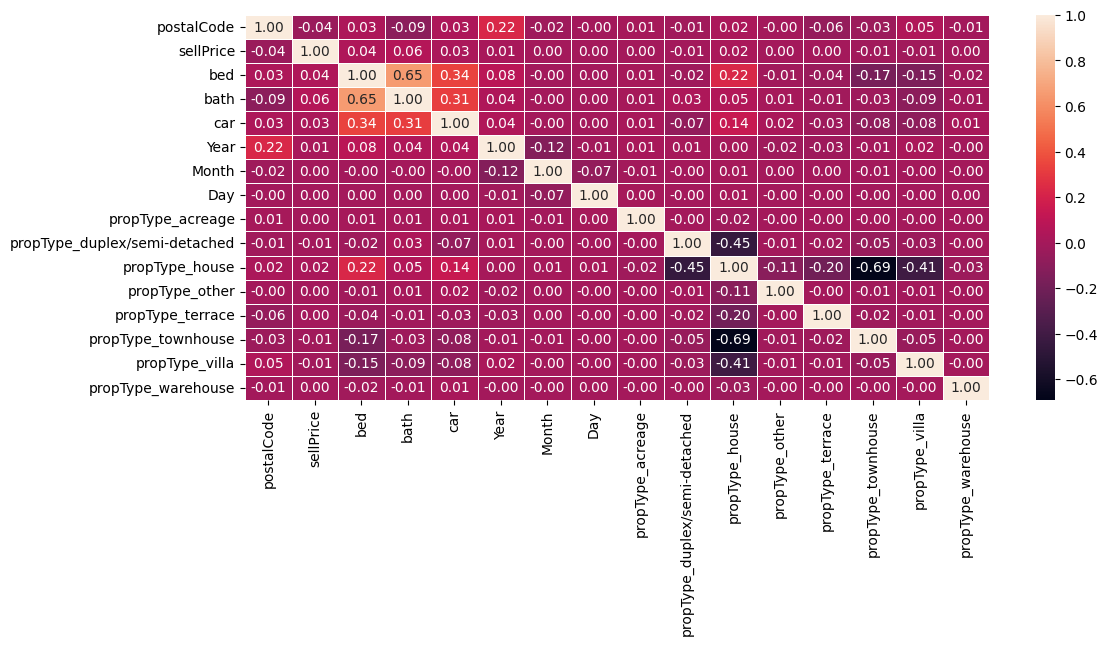

In [13]:
#Isı haritasını inceleyelim.
fig = plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True ,linewidth=0.5,fmt='.2F');

<Axes: xlabel='Year', ylabel='count'>

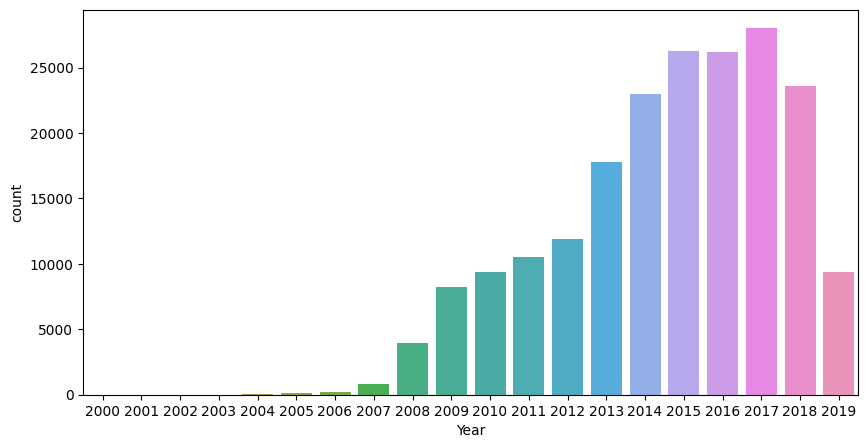

In [14]:
#Yıllara göre ev satışını gösteren grafiği çizelim.
plt.figure(figsize=(10,5))
sns.countplot(x="Year", data=df)

<Axes: xlabel='Year', ylabel='sellPrice'>

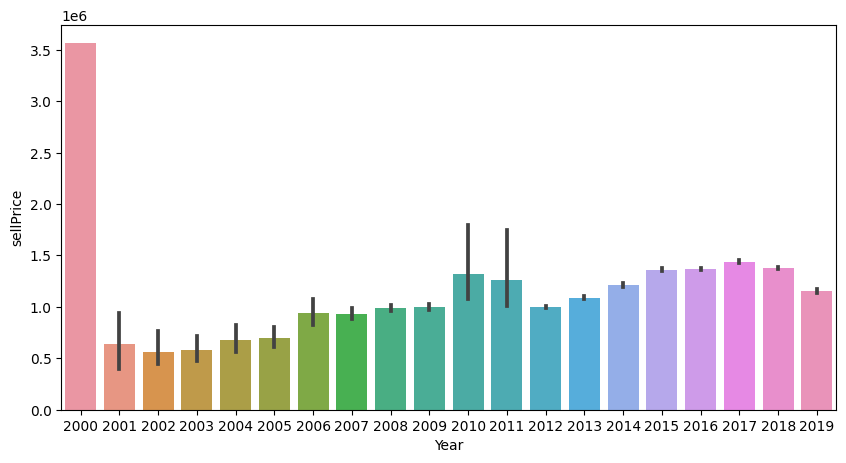

In [15]:
#Yıllara göre ev fiyatlarını çizelim.
plt.figure(figsize=(10,5))
sns.barplot(x = df["Year"], y = df["sellPrice"], data = df) 

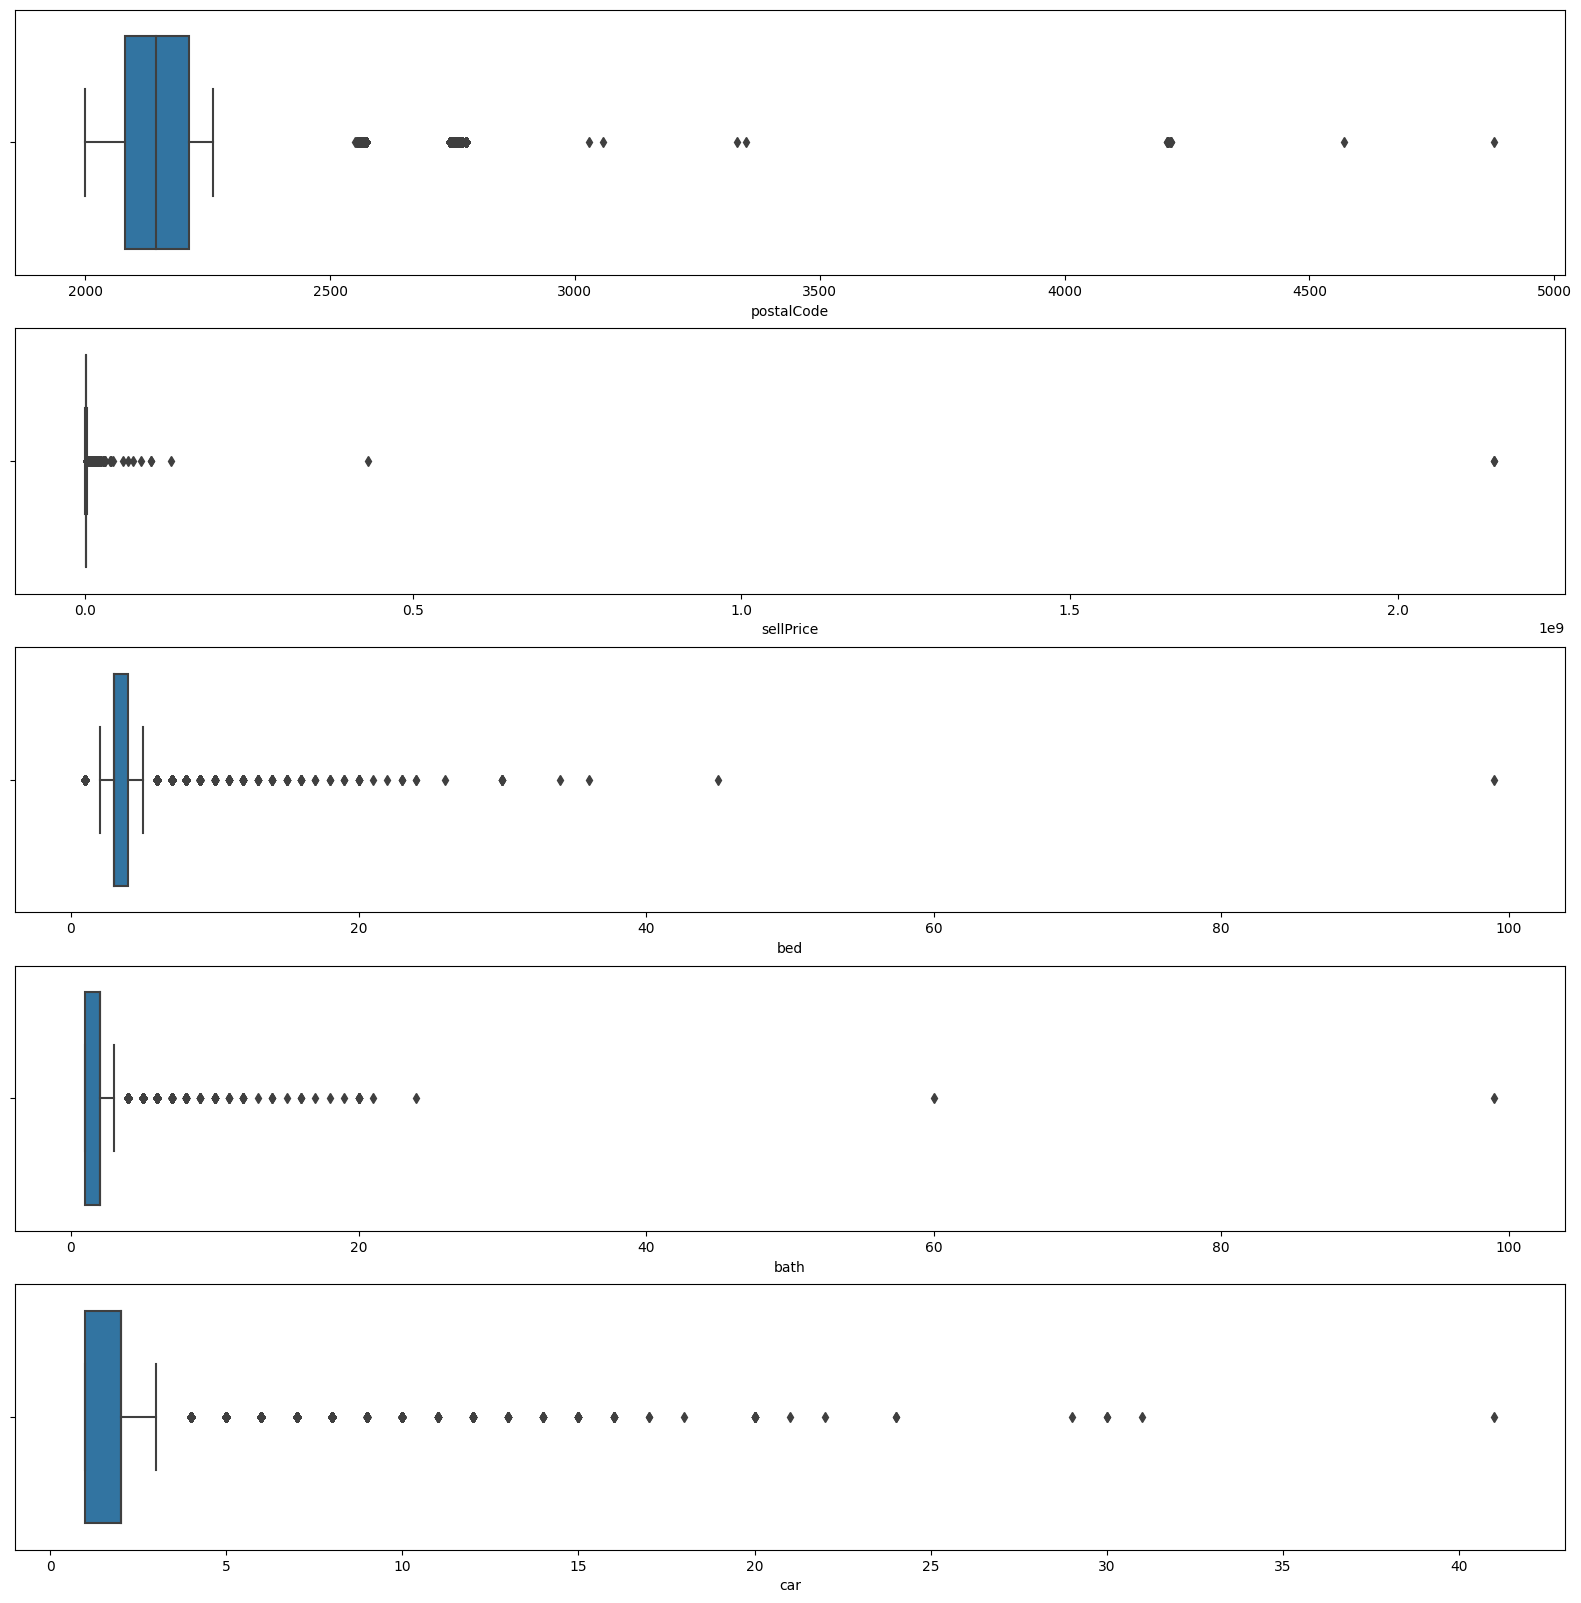

In [55]:
#Bazı sütunlar için kutu grafiği çizip aykırı değerleri gözlemleyelim.
fig = plt.figure(figsize=(20,20))
a1 = fig.add_subplot(5, 1, 1)
a2 = fig.add_subplot(5, 1, 2)
a3 = fig.add_subplot(5, 1, 3)
a4 = fig.add_subplot(5, 1, 4)
a5 = fig.add_subplot(5, 1, 5)
sns.boxplot(ax=a1 ,x=df["postalCode"])
sns.boxplot(ax=a2 ,x=df["sellPrice"])
sns.boxplot(ax=a3 ,x=df["bed"])
sns.boxplot(ax=a4 ,x=df["bath"])
sns.boxplot(ax=a5 ,x=df["car"]);

In [56]:
# Aykırı değerler sınırları ayarlamak için IQR yöntemi kullanılarak alt ve üst sınırları hesaplayan bir döngü oluşturalım.
degiskenler = list(df.select_dtypes(["int64","float64"]))

altveust = {}

for col in degiskenler:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = 1.5*(q3-q1)

    alt = q1-iqr
    ust = q3+iqr
    altveust[col] = (alt,ust)
    df.loc[(df.loc[:,col]<alt),col] = alt * 0.75
    df.loc[(df.loc[:,col]>ust),col] = ust* 1.25


altveust

{'postalCode': (1888.5, 2404.5),
 'sellPrice': (-412500.0, 2607500.0),
 'bed': (1.5, 5.5),
 'bath': (-0.5, 3.5),
 'car': (-0.5, 3.5)}

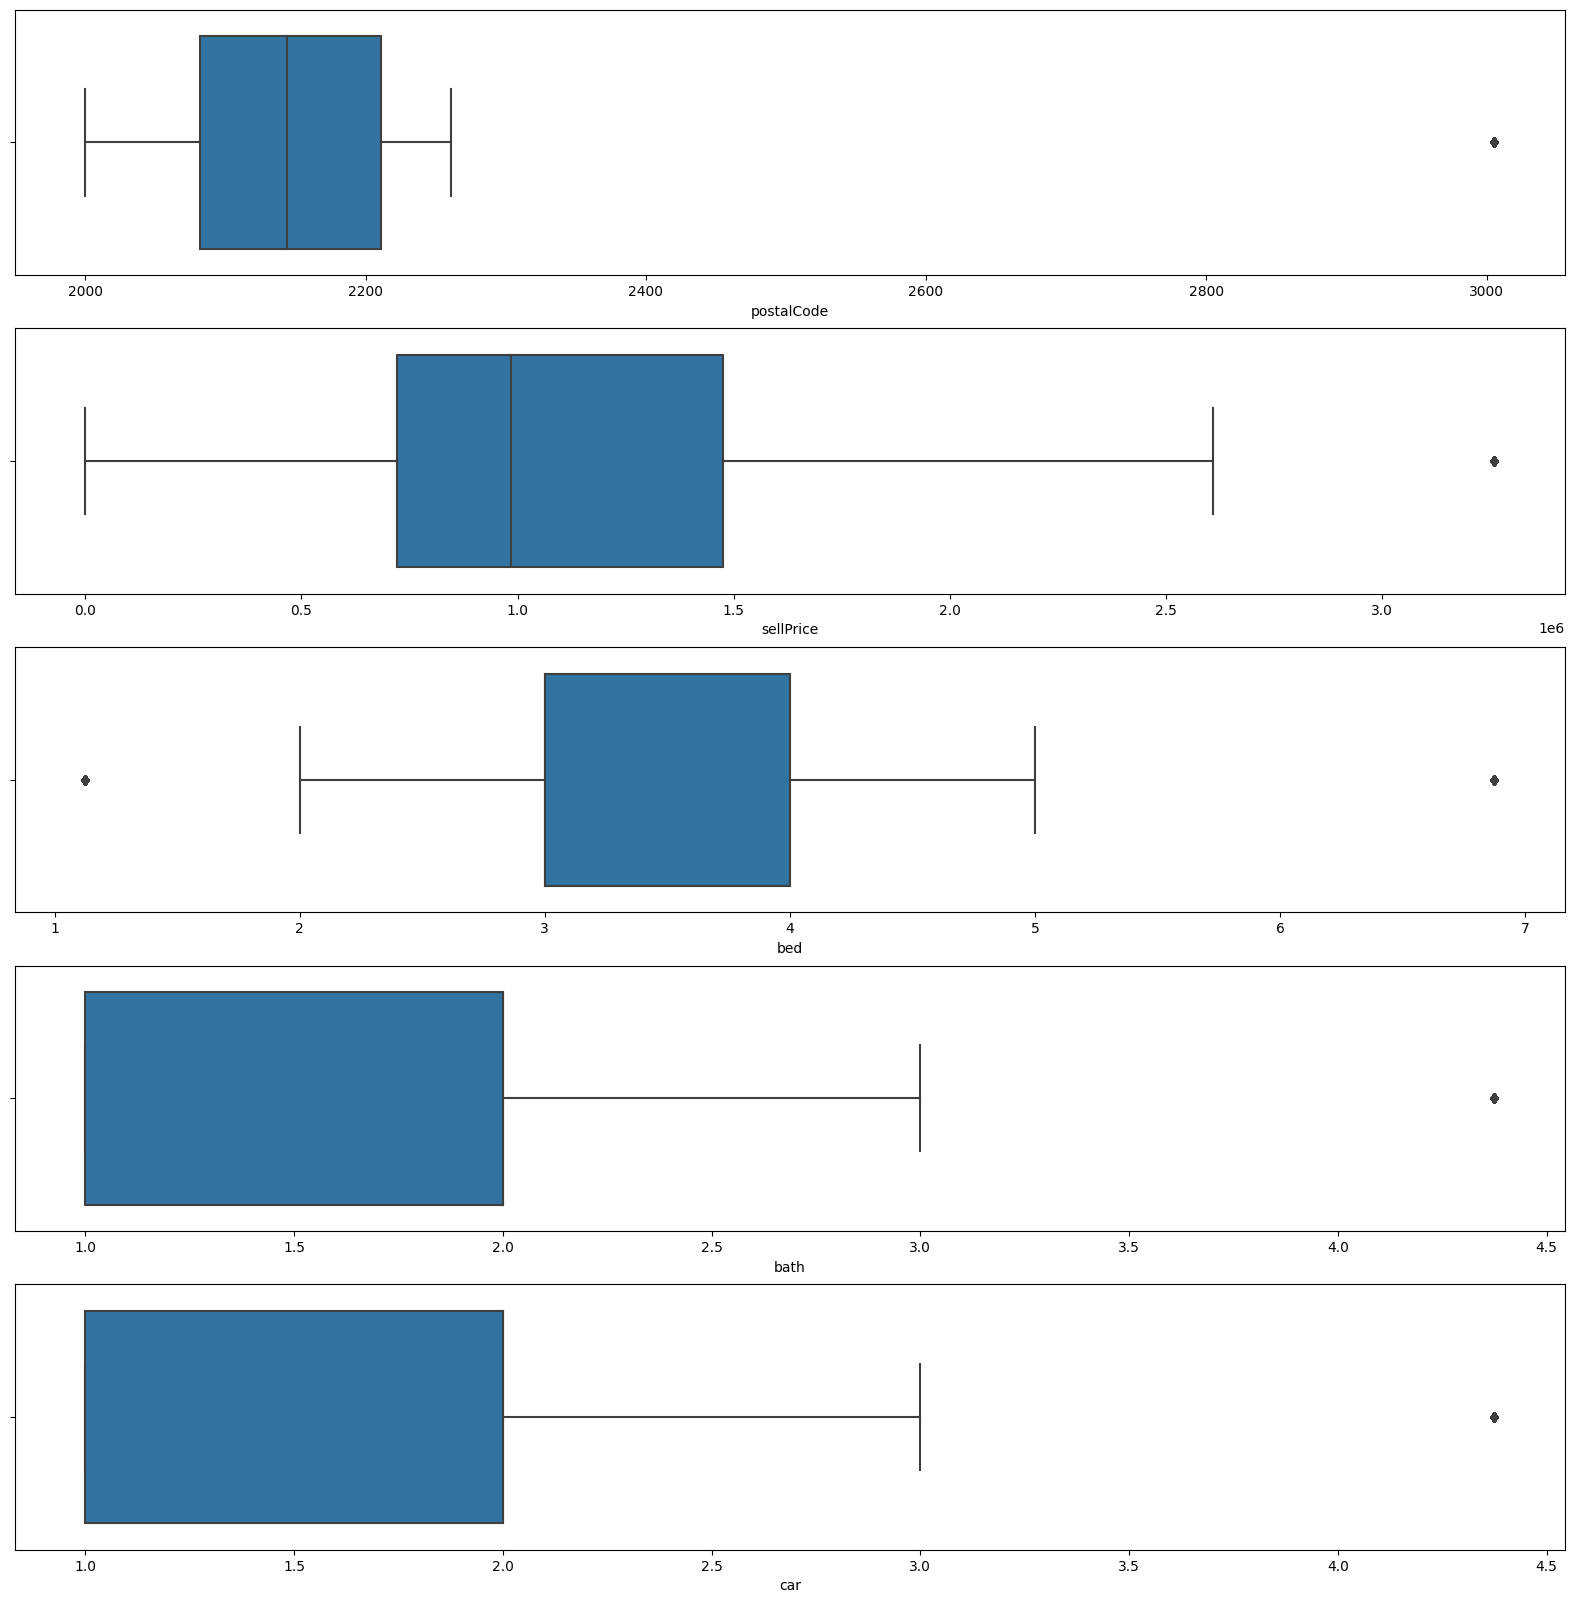

In [57]:
#Kutu gırafiğinin son hali.
fig = plt.figure(figsize=(20,20))
a1 = fig.add_subplot(5, 1, 1)
a2 = fig.add_subplot(5, 1, 2)
a3 = fig.add_subplot(5, 1, 3)
a4 = fig.add_subplot(5, 1, 4)
a5 = fig.add_subplot(5, 1, 5)
sns.boxplot(ax=a1 ,x=df["postalCode"])
sns.boxplot(ax=a2 ,x=df["sellPrice"])
sns.boxplot(ax=a3 ,x=df["bed"])
sns.boxplot(ax=a4 ,x=df["bath"])
sns.boxplot(ax=a5 ,x=df["car"]);

In [19]:
#Boş değerlerin sayısını görelim.
df.isnull().sum()

postalCode                           0
sellPrice                            0
bed                                154
bath                                 0
car                              18151
Year                                 0
Month                                0
Day                                  0
propType_acreage                     0
propType_duplex/semi-detached        0
propType_house                       0
propType_other                       0
propType_terrace                     0
propType_townhouse                   0
propType_villa                       0
propType_warehouse                   0
dtype: int64

In [58]:
#KNNImputer kullanarak eksik verileri dolduralım.
knn_imputer = KNNImputer()

In [59]:
df["bed"] = knn_imputer.fit_transform(df[["bed"]])
df["car"] = knn_imputer.fit_transform(df[["car"]])

In [36]:
df.isnull().sum()

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64

In [23]:
#'sellPrice' değişkeninin kolerasyonuna göz atalım.
df.corr()["sellPrice"]

postalCode                      -0.358742
sellPrice                        1.000000
bed                              0.376424
bath                             0.465725
car                              0.218642
Year                             0.177044
Month                            0.015159
Day                              0.005055
propType_acreage                 0.008919
propType_duplex/semi-detached   -0.059209
propType_house                   0.202068
propType_other                  -0.010698
propType_terrace                 0.019996
propType_townhouse              -0.152921
propType_villa                  -0.129989
propType_warehouse               0.002891
Name: sellPrice, dtype: float64

# stats model

In [60]:
#Modelimiz için X ve y değişkenlerini belirleyelim.
X = df.drop(["sellPrice"],axis=1)
y = df["sellPrice"]
X = sm.add_constant(X)

In [61]:
#Verisetini test ve train olarak bölelim.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
#Modeli oluşturup parametre ve sonuçlarına bakalım.
stats_model = sm.OLS(y_train,X_train).fit()

In [63]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sellPrice   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     8267.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:28:27   Log-Likelihood:            -2.3311e+06
No. Observations:              159603   AIC:                         4.662e+06
Df Residuals:                  159588   BIC:                         4.662e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.029e+08   8.58e+05   -119.825      0.000   -1.05e+08   -1.01e+08
postalCode                     -893.3355      4.580   -195.071      0.000    -902.311    -884.360
bed                            6.182e+04   1826.724     33.841      0.000    5.82e+04    6.54e+04
bath                           2.715e+05   2124.430    127.821      0.000    2.67e+05    2.76e+05
car                             4.34e+04   1666.894     26.038      0.000    4.01e+04    4.67e+04
Year                           5.862e+04    480.218    122.060      0.000    5.77e+04    5.96e+04
Month                          8006.1496    410.046     19.525      0.000    7202.468    8809.831
Day                             461.0152    153.674      3.000      0.003     159.818     762.212
propType_acreage              -1.226e+07   1.86e+05    -66.090      0.000   -1.26e+07   -1.19e+07
propType_duplex/semi-detached -1.318e+07    1.1e+05   -120.065      0.000   -1.34e+07    -1.3e+07
propType_house                -1.284e+07   1.09e+05   -117.305      0.000   -1.31e+07   -1.26e+07
propType_other                -1.293e+07   1.12e+05   -115.381      0.000   -1.31e+07   -1.27e+07
propType_terrace              -1.273e+07    1.1e+05   -115.525      0.000   -1.29e+07   -1.25e+07
propType_townhouse            -1.323e+07    1.1e+05   -120.632      0.000   -1.34e+07    -1.3e+07
propType_villa                -1.317e+07    1.1e+05   -119.828      0.000   -1.34e+07    -1.3e+07
propType_warehouse            -1.253e+07   1.42e+05    -88.258      0.000   -1.28e+07   -1.22e+07
==============================================================================
Omnibus:                    33889.012   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76008.990
Skew:                           1.218   Prob(JB):                         0.00
Kurtosis:                       5.344   Cond. No.                     1.35e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
stats_model.params

const                           -1.028618e+08
postalCode                      -8.933355e+02
bed                              6.181773e+04
bath                             2.715469e+05
car                              4.340215e+04
Year                             5.861525e+04
Month                            8.006150e+03
Day                              4.610152e+02
propType_acreage                -1.225978e+07
propType_duplex/semi-detached   -1.317861e+07
propType_house                  -1.284282e+07
propType_other                  -1.292732e+07
propType_terrace                -1.272961e+07
propType_townhouse              -1.322612e+07
propType_villa                  -1.317169e+07
propType_warehouse              -1.252579e+07
dtype: float64

In [68]:
y_pred_stats = stats_model.predict(X_test)

In [69]:
mean_squared_error(y_test,y_pred_stats)

290209683394.4321

In [65]:
stats_model.mse_model

2352065357814656.0

In [66]:
#Yeni bir ev oluşturup modelimize fiyat tahmini yaptıralım.
yeniveri=pd.DataFrame=(1,2107,3,3,3,2015,6,23,0,0,1,0,0,0,0,0)
predictions = stats_model.predict(yeniveri)
tahmin = predictions[0]
print("Tahmin Değeri:", tahmin)


Tahmin Değeri: 1711832.35294348


# lr model

In [70]:
#Modelimizi kurup fit edelim ve sonuçlarına bakalım.
reg_model= LinearRegression().fit(X_train, y_train)

In [71]:
y_pred_lr = reg_model.predict(X_test)

In [72]:
mean_squared_error(y_test,y_pred_lr)

290209683394.4317

In [74]:
#Yeni bir ev oluşturup modelimize fiyat tahmini yaptıralım.
yeniveri = np.array([1,2107, 3, 3, 3, 2015, 6, 23, 0, 0, 1, 0, 0, 0, 0, 0])
yeniveri_reshaped = yeniveri.reshape(1, -1)  # Veriyi 2D diziye dönüştürme
tahmin = reg_model.predict(yeniveri_reshaped)
print("Tahmin Değeri:", tahmin)


Tahmin Değeri: [1711832.35294361]


C:\Users\deniz\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# elasticnet

In [75]:
#Modelimizi kurup fit edelim ve sonuçlarına bakalım.
enet_model = ElasticNet().fit(X_train, y_train)

In [78]:
y_pred_enet = enet_model.predict(X_test)

In [79]:
mean_squared_error(y_test,y_pred_enet)

306580537787.08264

In [80]:
#Yeni bir ev oluşturup modelimize fiyat tahmini yaptıralım.
yeniveri = np.array([1,2107, 3, 3, 3, 2015, 6, 23, 0, 0, 1, 0, 0, 0, 0, 0])
yeniveri_reshaped = yeniveri.reshape(1, -1)  # Veriyi 2D diziye dönüştürme
tahmin = reg_model.predict(yeniveri_reshaped)
print("Tahmin Değeri:", tahmin)


Tahmin Değeri: [1711832.35294361]


C:\Users\deniz\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
